In [1]:
from model import DepthEstimate
import matplotlib.pyplot as plt
from skimage.transform import resize
import numpy as np
import skimage
import cv2

In [2]:
def DepthNorm(x, maxDepth):
    return maxDepth / x

def scale_up(scale, images):
    from skimage.transform import resize
    scaled = []
    
    for i in range(len(images)):
        img = images[i]
        output_shape = (scale * img.shape[0], scale * img.shape[1])
        scaled.append( resize(img, output_shape, order=1, preserve_range=True, mode='reflect', anti_aliasing=True ) )

    return np.stack(scaled)

In [3]:
model = DepthEstimate()
checkpoint_path = "model weights/training_1/cp.ckpt"
model.load_weights(checkpoint_path)

print('Model weights loaded.')

Base model loaded DenseNet169

Model created.
Model weights loaded.


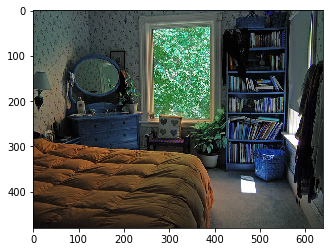

In [11]:
rgb = np.load('eigen_test_rgb.npy')
depth = np.load('eigen_test_depth.npy')

# inp_rgb = rgb[0]
inp_rgb = cv2.imread('my_examples/000000000632.jpg')
if inp_rgb.shape[0] != 480 or inp_rgb.shape[1] != 640:  
    inp_rgb = resize(inp_rgb, (480,640))
    inp_rgb *= 255 
    inp_rgb = np.round(inp_rgb)
    inp_rgb = inp_rgb.astype(int)
    
plt.imshow(inp_rgb)
plt.show()
# inp_depth = depth[0]
# plt.imshow(inp_depth, cmap='plasma')
# plt.show()
if len(inp_rgb.shape) < 3: inp_rgb = np.stack((inp_rgb,inp_rgb,inp_rgb), axis=2)
if len(inp_rgb.shape) < 4: inp_rgb = inp_rgb.reshape((1, inp_rgb.shape[0], inp_rgb.shape[1], inp_rgb.shape[2]))

In [12]:
prediction = model.predict(inp_rgb/255)

out = np.clip(DepthNorm(prediction, maxDepth=1000), 10, 1000) / 1000

scaled_out = scale_up(2, out)

final = scaled_out[0]

final = final[:,:,0]

final *= 10.0

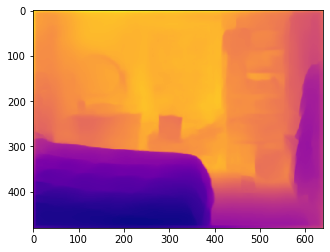

In [13]:
plt.imshow(final, cmap='plasma')
plt.show()